# Simulation und Modellierung WS17/18 - Uebung 08

### Aufgabe 1 : Oberflaechen Plots

Wenn sich die Punkte $\vec{r}=\vec{r}(p,q)$ einer Flaeche als Funktion von zwei verallgemeinerten Koordinaten $p\in[p_{min},p_{max}]$ sowie $q\in[q_{min},q_{max}]$ parametrisieren lassen, dann kann man diese Flaeche in einem 3-dimensionalen `mplot3d` Plot darstellen.
```python
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

Lp = 200
Lq = 200
p = np.linspace(pmin,pmax,Lp)
q = np.linspace(qmin,qmax,Lq)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

x = calculate_x(P,Q) # x[i,j] = x(p[i],q[j])
y = calculate_y(P,Q)
z = calculate_z(P,Q)

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_surface(x,y,z,rstride=...,cstride=...)    # oder plot_wireframe(...)


ax3d.set_xlim(...) # man sollte moeglichst gleich grosse Koordinatenbereiche waehlen,
ax3d.set_ylim(...) # um Verzerrungen bei der Darstellung zu vermeiden
ax3d.set_zlim(...)

# Plotaufbereitung

show()
```

Finden Sie geeignete Parametrisierungen der folgenden Flaechen, und plotten diese in 3d als Wireframe- oder Surface Plots mit geeigneter Farbskala `cmap` oder individuellen `facecolors` :

- Kugeloberflaeche
- Torus 
- <a href="https://en.wikipedia.org/wiki/M%C3%B6bius_strip">Moebiusband</a>


**Zusatzaufgabe :** Schreiben Sie eine Funktion `Tknot(p,q,R=2,r=1,h=0.1,Lp=200,Lq=200)`, welche einen Schlauch um einen<a href="">`(p,q)` Torusknoten</a> auf einem Torus mit Radius `R`, Torusschlauchradius `r` und Torusknotenschlauchradius `h` zeichnet. (Der 1d Torusknoten hat nur eine verallgemeinerte Koordinate. Die andere parametrisiert einen senkrechten Ring in Abstand `h` um den Torusknoten)

<IPython.core.display.Javascript object>


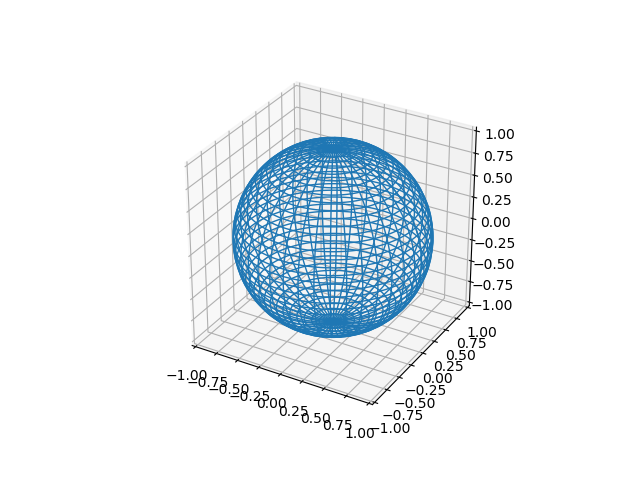

In [2]:


%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

Lp = 200
Lq = 200
p = np.linspace(0,2*np.pi,Lp)
q = np.linspace(0,np.pi,Lq)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

x = np.cos(P)*np.sin(Q)
y = np.sin(P)*np.sin(Q)
z = np.cos(Q)


fig=figure('3D function surface plot')
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_wireframe(x,y,z,rstride=5,cstride=5, linewidth=1)    # oder plot_wireframe(...)


ax3d.set_xlim(-1,1) # man sollte moeglichst gleich grosse Koordinatenbereiche waehlen,
ax3d.set_ylim(-1,1) # um Verzerrungen bei der Darstellung zu vermeiden
ax3d.set_zlim(-1,1)


# Plotaufbereitung

show()



<IPython.core.display.Javascript object>


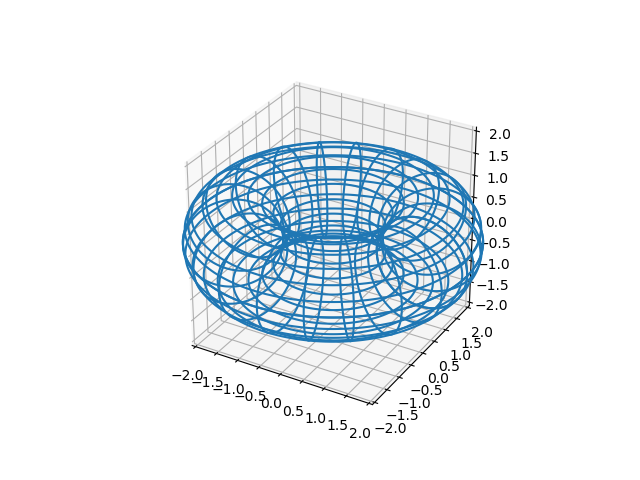

In [3]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

R = 2
r = 1

pmin = 0
qmin = 0
pmax = 2*pi
qmax = 2*pi

Lp = 200
Lq = 200
p = np.linspace(pmin,pmax,Lp)
q = np.linspace(qmin,qmax,Lq)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

x = (R + r * cos(P)) * cos(Q)
y = (R + r * cos(P)) * sin(Q)
z = r * sin(P)

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_wireframe(x,y,z,rstride=10,cstride=10)    # oder plot_wireframe(...)


ax3d.set_xlim(-2,2) # man sollte moeglichst gleich grosse Koordinatenbereiche waehlen,
ax3d.set_ylim(-2,2) # um Verzerrungen bei der Darstellung zu vermeiden
ax3d.set_zlim(-2,2)

# Plotaufbereitung

show()

<IPython.core.display.Javascript object>


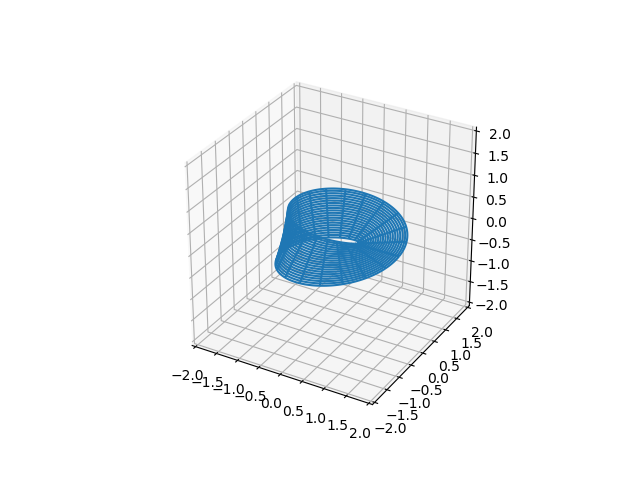

In [4]:


%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

R = 2
r = 0

pmin = 0
qmin = -1
pmax = 2*pi
qmax = 1

Lp = 200
Lq = 200
p = np.linspace(pmin,pmax,Lp)
q = np.linspace(qmin,qmax,Lq)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

x = cos(P) * (1 + (Q/2) * cos(P/2))
y = sin(P) * (1 + (Q/2) * cos(P/2))
z = (Q / 2) * sin(P / 2)

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_wireframe(x,y,z,rstride=10,cstride=10)    # oder plot_wireframe(...)


ax3d.set_xlim(-2,2) # man sollte moeglichst gleich grosse Koordinatenbereiche waehlen,
ax3d.set_ylim(-2,2) # um Verzerrungen bei der Darstellung zu vermeiden
ax3d.set_zlim(-2,2)

# Plotaufbereitung

show()



### Aufgabe 2 : Newton Fraktale

- Schreiben Sie eine Funktion `Newton_Steps(x0,f,fprime,dmin=1e-15,dmax=1e3,Nmax=100)` welche das Newton Verfahren mit der Funktion `f(x)` und deren Ableitung `fprime(x)` beginnend bei $x_0$ solange ausfuehrt bis $\left|f(x_n)\right|\le d_{min}$, $\left|f(x_n)\right|\ge d_{max}$ oder $n=N_{max}$ und den Wert $x_n$ der Nullstellen-Naeherung sowie die Zahl $n$ der notwendigen Iterationsschritte ausgibt.

- Bestimmen Sie fuer alle *komplexen* Anfangswerte $z =x+iy $ auf einem geeigneten Gitter die Approximation der von dort gefundenen Nullstellen der Funktion $f(z)=z^3-1$ und die Zahl der benoetigten Iterationsschritte. Berechnen Sie aus diesen Werten geeignete `[r,g,b]` Farben oder eine skalare Funktion und plotten Sie diese mit `imshow` ueber dem Gitter.

Hinweis : Wenn Sie die Funktionen `Newton_Steps`, `f` und `fprime` sorgfaeltig programmieren, koennen diese direkt auf ein ganzes `numpy` Feld von Anfangswerten gleichzeitig angewendet werden ohne Python Schleifen zu verwenden.

#### Zusatzaufgabe :

- Definieren Sie eine Funktion `polymaker(c)` welche bei einem gegebenen iterierbaren Container `c` mit Nullstellen $c_i$ die Funktion `f(x)`$=\prod_i (x-c_i)$ und deren Ableitung `fprime(x)`$=\sum_i \prod_{j\ne i} (x-c_j)$ dynamisch generiert und als Funktionsobjekte zurueckliefert.

- Plotten Sie Beispiele fuer Newton Fraktale von verschiedenen Funktionen, die Sie mit `polymaker(c)` erzeugen.

**frohe Weihnachtsferien!**

<IPython.core.display.Javascript object>


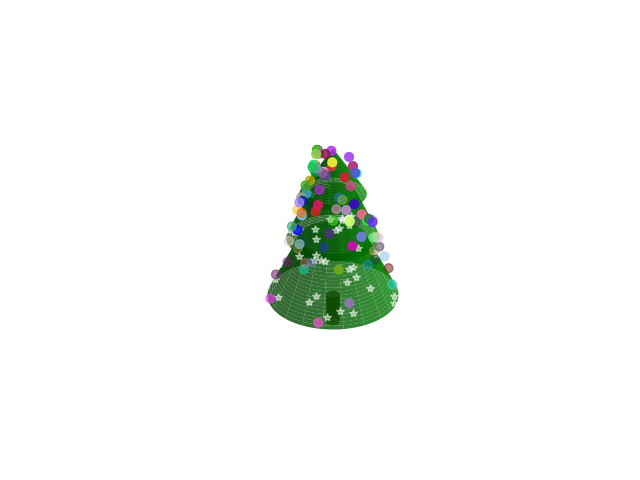

In [5]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

nb = 80           # number of ornamental balls
sb = 40           # size of onramental balls

ns = 100          # number of snow flakes
ms = 'w*'         # marker color and shape of snow flakes
alpha_snow=0.5    # alpha value of snow flakes

alpha_tree=0.8    # alpha value for tree surface



Lh = 100
Lphi = 100
h = np.linspace(0,1,Lh)
phi = np.linspace(0,2*pi,Lphi)
H,PHI = np.meshgrid(h,phi)                #meshgrid of cylinder coordinates

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)

#tree trunk
ax3d.plot_surface(cos(PHI)*0.2,sin(PHI)*0.2,H,rstride=5,cstride=5,color=[0.3,0.1,0],linewidth=0,alpha=alpha_tree) 

#branch cones
ax3d.plot_surface((2-H)*cos(PHI),(2-H)*sin(PHI),1+2*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree) 
ax3d.plot_surface(0.7*(2-H)*cos(PHI),0.7*(2-H)*sin(PHI),3+1.5*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree)
ax3d.plot_surface((1-H)*cos(PHI),(1-H)*sin(PHI),4.5+1.5*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree)

#ornamental ball positions (cylinder coordinates) and colors
hn = np.random.random(nb)
pn = np.random.random(nb)*2*pi
cn = np.random.random((nb,3))
ax3d.scatter3D(1.5*(1.3-hn)*cos(pn),1.5*(1.3-hn)*sin(pn),1+5*hn,s=40,c=cn)


#snow positions and velocities
snox = np.random.random(ns)*6-3
snoy = np.random.random(ns)*6-3
snoz = np.random.random(ns)*6
snov = -np.random.random(ns)*0.01
mysnow, = ax3d.plot3D(snox,snoy,snoz,ms,alpha=alpha_snow)

ax3d.set_xlim(-3,3)
ax3d.set_ylim(-3,3)
ax3d.set_zlim(0,6)
axis('off')

def animate(i):
    global snox,snoy,snoz
    snoz=mod(snoz+snov,6)
    snox=mod(snox+3+np.random.randn(ns)*0.01,6)-3
    snoy=mod(snoy+3+np.random.randn(ns)*0.01,6)-3
    mysnow.set_data(snox,snoy)
    mysnow.set_3d_properties(snoz) # 3D Plots have no set_zdata(...) function
    return None
    
def init():
    return None

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=1, blit=True)

show()